In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import plotly.express as px
import os
import warnings
import joblib
warnings.filterwarnings("ignore")

In [2]:
TR_data=pd.read_csv("smoke_dataset.csv")
TR_data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1655127646,15.127,42.98,199,426,12775,20524,937.420,1.55,1.61,10.66,1.663,0.038,3338,0
1,1654734418,27.107,54.80,0,400,13058,19961,939.799,0.21,0.22,1.46,0.228,0.005,1087,0
2,1654714047,26.370,45.80,144,409,12784,20580,937.376,1.97,2.05,13.59,2.118,0.048,1860,0
3,1654715196,25.980,48.42,180,431,12771,20537,937.333,1.93,2.01,13.31,2.075,0.047,3009,0
4,1655125243,-1.197,41.36,76,400,12791,20673,937.556,1.90,1.97,13.08,2.040,0.046,935,0


In [3]:
TR_data.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [4]:
TR_data['Fire Alarm'].unique()

array([0, 1], dtype=int64)

In [5]:
TR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             5000 non-null   int64  
 1   Temperature[C]  5000 non-null   float64
 2   Humidity[%]     5000 non-null   float64
 3   TVOC[ppb]       5000 non-null   int64  
 4   eCO2[ppm]       5000 non-null   int64  
 5   Raw H2          5000 non-null   int64  
 6   Raw Ethanol     5000 non-null   int64  
 7   Pressure[hPa]   5000 non-null   float64
 8   PM1.0           5000 non-null   float64
 9   PM2.5           5000 non-null   float64
 10  NC0.5           5000 non-null   float64
 11  NC1.0           5000 non-null   float64
 12  NC2.5           5000 non-null   float64
 13  CNT             5000 non-null   int64  
 14  Fire Alarm      5000 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 586.1 KB


In [6]:
TR_data.duplicated().sum()

0

In [7]:
TR_data = TR_data.rename(columns={"Temperature[C]": "Temperature", "Humidity[%]": "Humidity","TVOC[ppb]": "TVOC","eCO2[ppm]": "eCO2","Pressure[hPa]": "Pressure","Raw Ethanol":"Ethanol"})

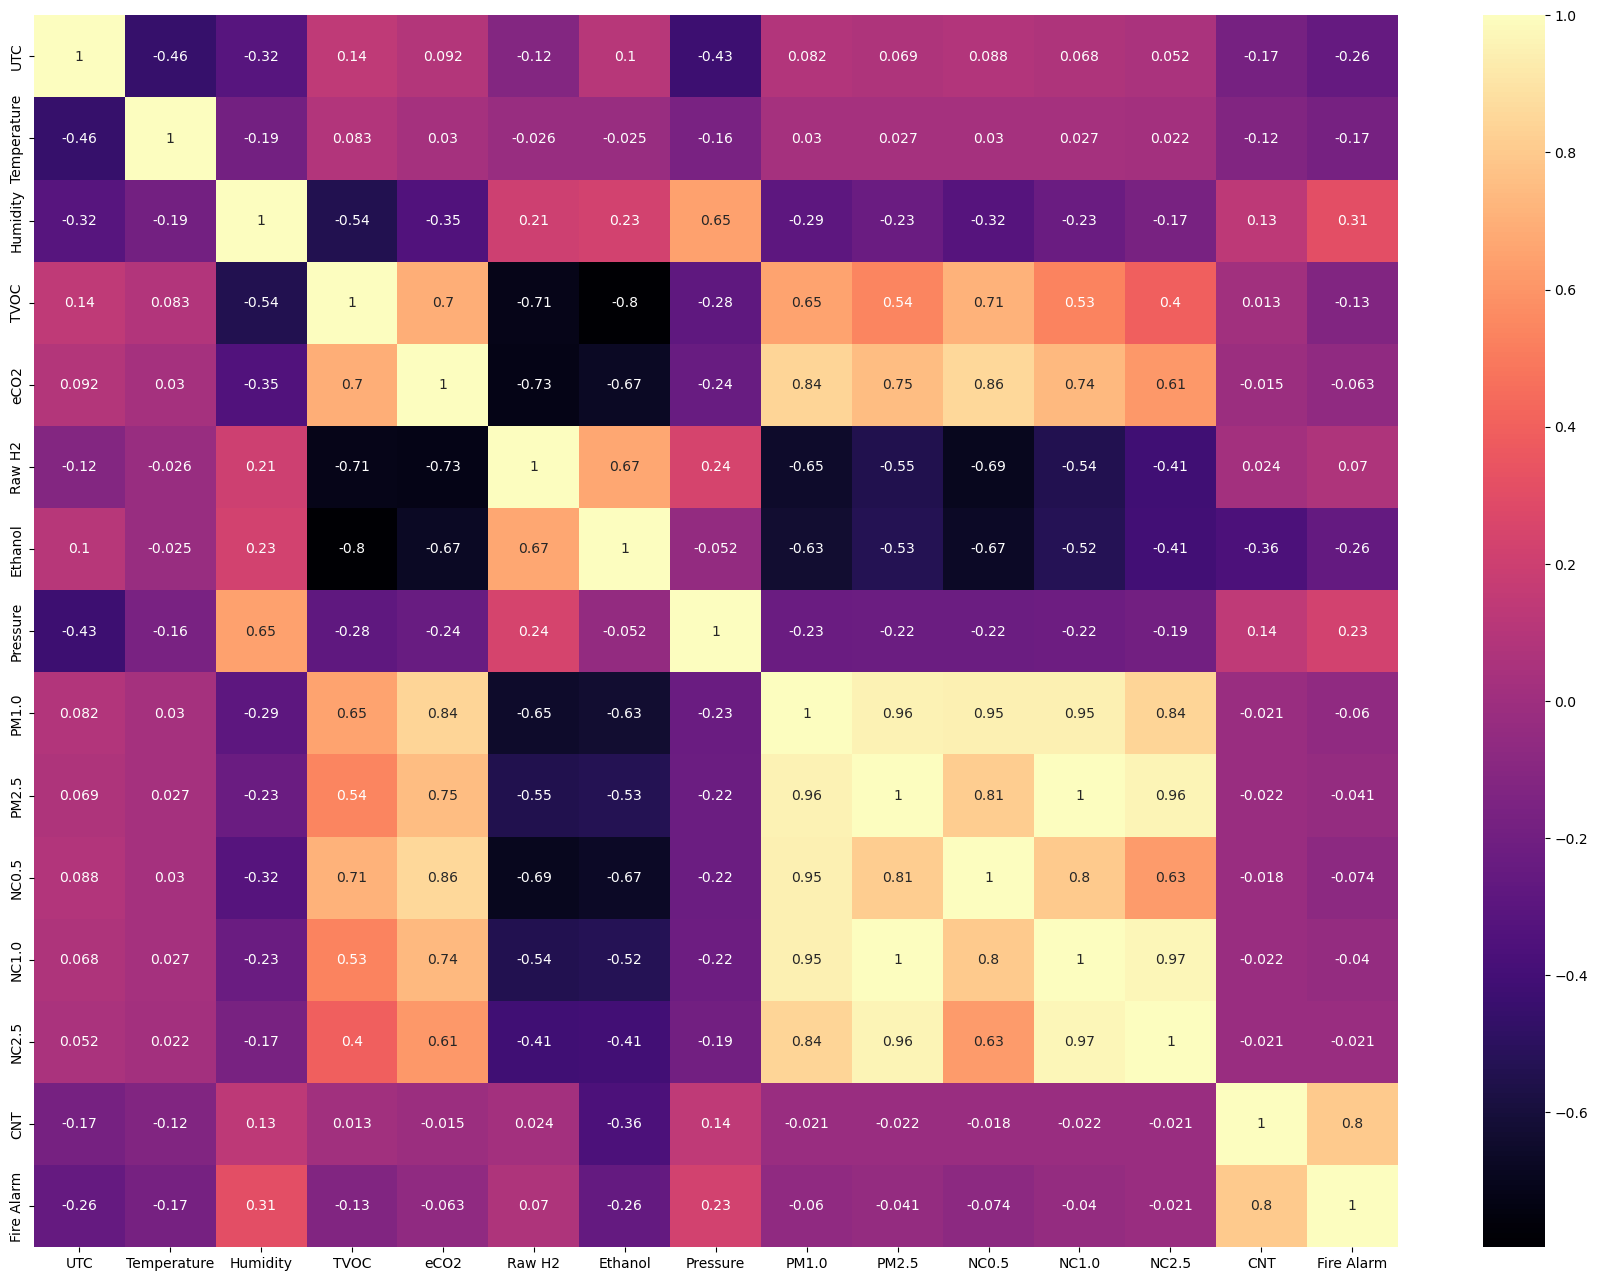

In [8]:
cor=TR_data.corr()
plt.figure(figsize = (22,16))
#plhttp://localhost:8888/notebooks/Downloads/101_3.ipynb#t.title('Correlation Matrix')
sns.heatmap(cor,annot = True,cmap='magma')
plt.show()

# Null Values

In [9]:
TR_data.isnull().sum()

UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
Raw H2         0
Ethanol        0
Pressure       0
PM1.0          0
PM2.5          0
NC0.5          0
NC1.0          0
NC2.5          0
CNT            0
Fire Alarm     0
dtype: int64

# Outliers

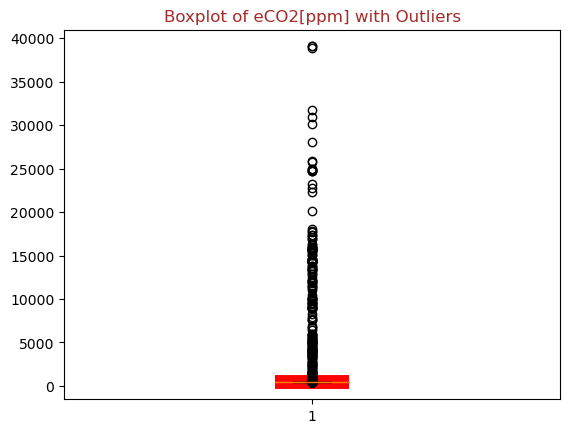

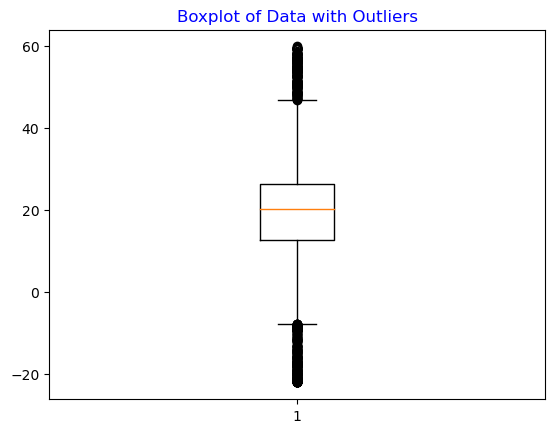

In [10]:
boxplot = plt.boxplot(TR_data['eCO2'], patch_artist=True)
for box in boxplot['boxes']:
    box.set(color='red', linewidth=10)
plt.title('Boxplot of eCO2[ppm] with Outliers', color='brown')
plt.show()


plt.boxplot(TR_data['Temperature'])
plt.title('Boxplot of Data with Outliers',color='blue')
plt.show()


In [13]:
columns = ['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Raw H2', 'Ethanol', 'Pressure', 'PM1.0', 'PM2.5','CNT']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(TR_data[col], 25), np.percentile(TR_data[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( TR_data[col] < lower) | (TR_data[col] > upper) )
    index_label = TR_data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    TR_data.drop(index_label, inplace=True)

Number of outliers in Temperature: 60
Number of outliers in Humidity: 0
Number of outliers in TVOC: 38
Number of outliers in eCO2: 0
Number of outliers in Raw H2: 0
Number of outliers in Ethanol: 0
Number of outliers in Pressure: 0
Number of outliers in PM1.0: 0
Number of outliers in PM2.5: 0
Number of outliers in CNT: 11


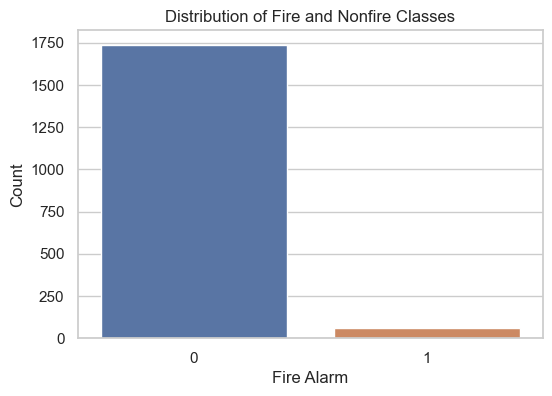

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=TR_data, x='Fire Alarm')
plt.xlabel('Fire Alarm')
plt.ylabel('Count')
plt.title('Distribution of Fire and Nonfire Classes')
plt.show()

<Axes: xlabel='eCO2', ylabel='Density'>

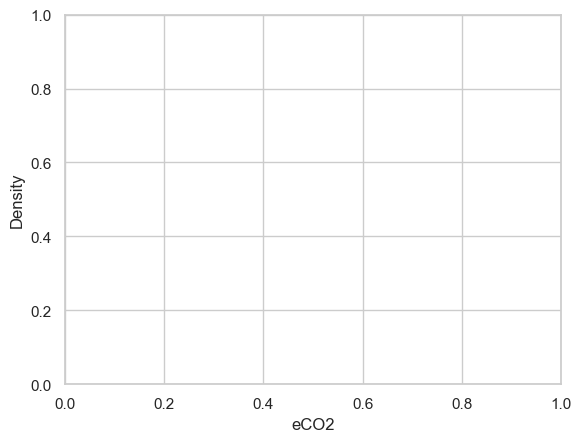

In [15]:
sns.kdeplot(TR_data['eCO2'], shade=True, color='purple')


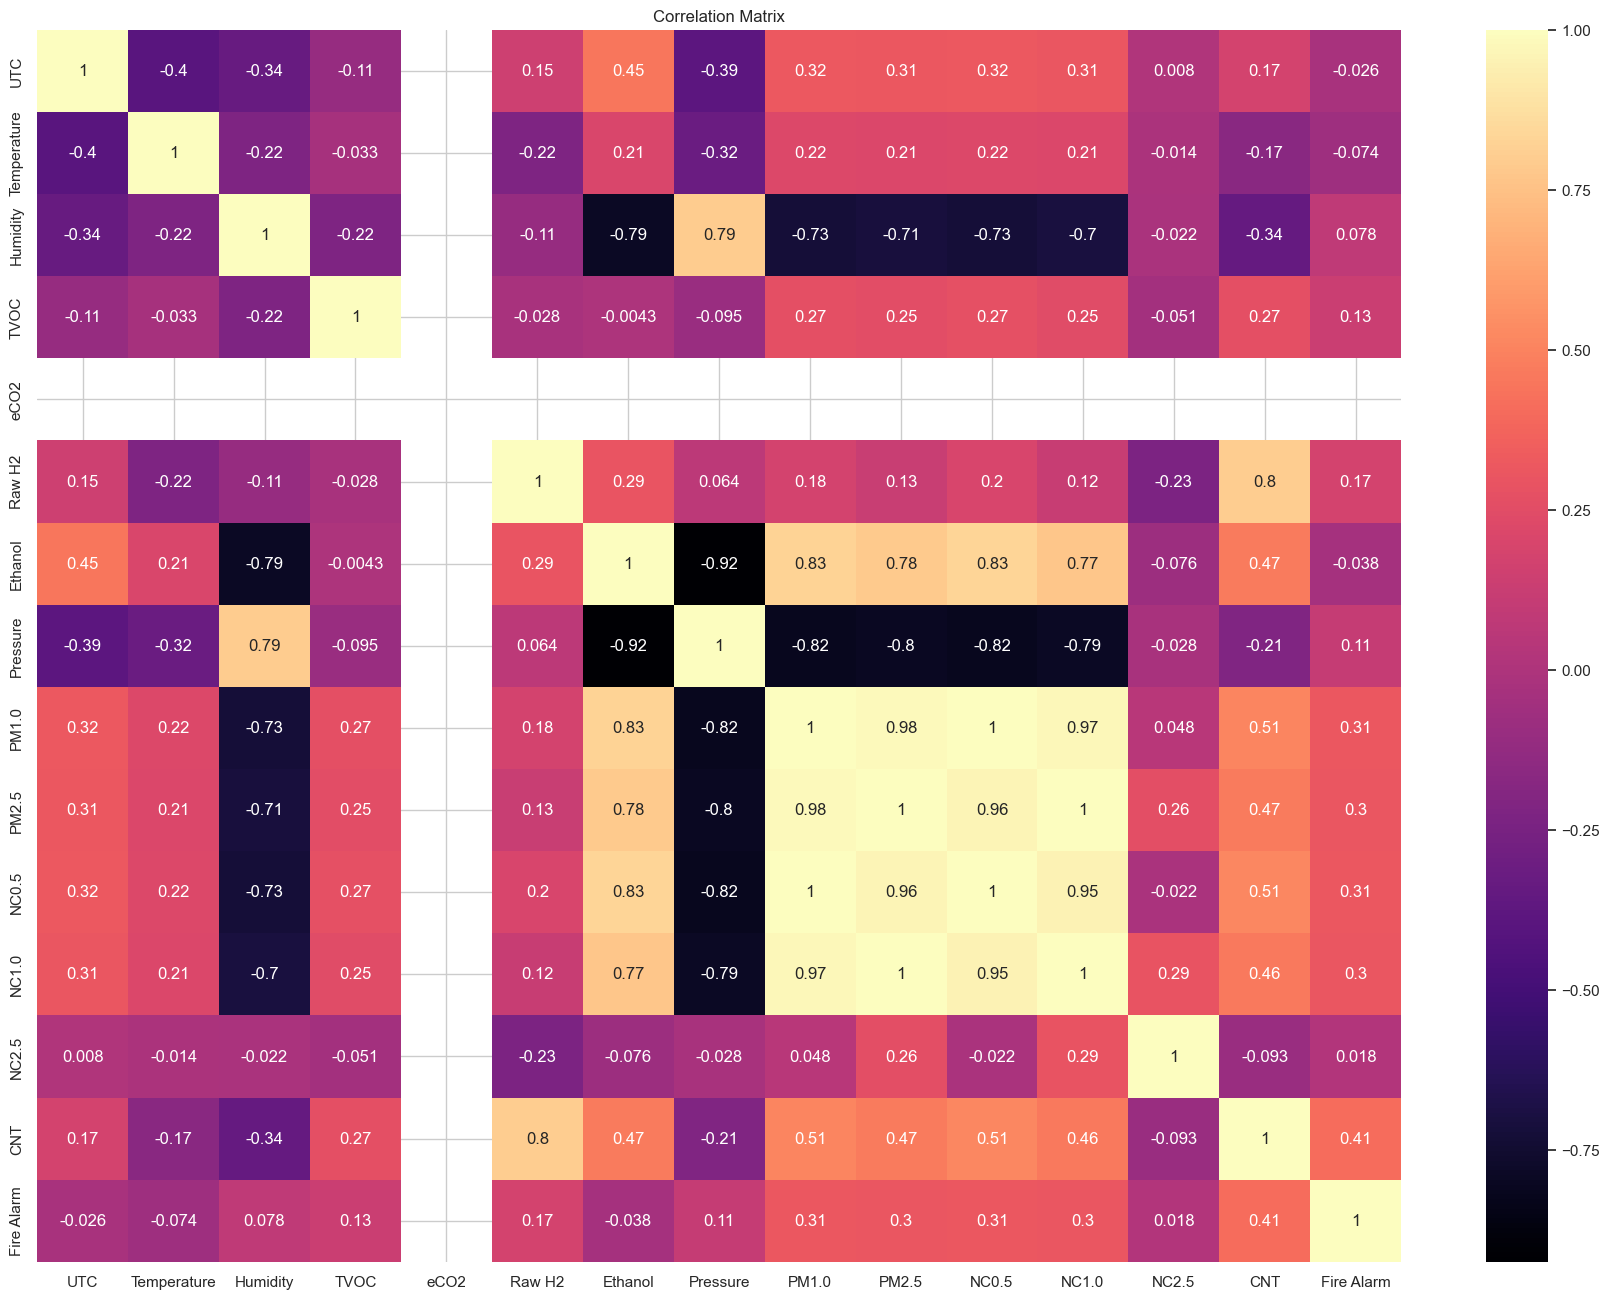

In [16]:
cor=TR_data.corr()
plt.figure(figsize = (22,16))
plt.title('Correlation Matrix')
sns.heatmap(cor,annot = True,cmap='magma')
plt.show()

In [17]:
cor1 = TR_data.corr(method='pearson')['Fire Alarm']
cor1

UTC           -0.026171
Temperature   -0.074172
Humidity       0.078090
TVOC           0.131964
eCO2                NaN
Raw H2         0.174767
Ethanol       -0.038360
Pressure       0.111210
PM1.0          0.310666
PM2.5          0.304459
NC0.5          0.309590
NC1.0          0.302132
NC2.5          0.018003
CNT            0.413070
Fire Alarm     1.000000
Name: Fire Alarm, dtype: float64

# After handling outliers

 the correlations between all columns and the 'Fire Alarm' column have changed. As a result, there are now some columns that should be considered for removal or dropping from the dataset.

In [18]:
TR_data.drop(['Raw H2'],axis=1,inplace=True)
TR_data

,UTC,Temperature,Humidity,TVOC,eCO2,Ethanol,Pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
1,1654734418,27.107,54.80,0,400,19961,939.799,0.21,0.22,1.46,0.228,0.005,1087,0
12,1655128041,12.364,44.50,0,400,21217,937.406,2.20,2.28,15.13,2.359,0.053,3733,0
16,1654734375,27.123,51.10,13,400,19940,939.776,0.37,0.39,2.57,0.401,0.009,1044,0
19,1654763502,17.550,52.07,0,400,20114,939.625,0.75,0.78,5.14,0.801,0.018,2159,0
23,1654735846,17.376,51.95,62,400,20115,939.616,0.97,1.01,6.68,1.041,0.024,2515,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4988,1654735733,18.620,52.30,40,400,20123,939.600,0.97,1.01,6.70,1.045,0.024,2402,0
4990,1654734321,27.112,50.54,3,400,19944,939.744,0.16,0.17,1.10,0.171,0.004,990,0
4992,1654762393,16.180,50.30,5,400,19942,939.774,0.36,0.38,2.51,0.391,0.009,1050,0
4993,1654713576,26.130,46.90,89,400,20635,937.425,1.76,1.83,12.10,1.887,0.043,1389,0


In [19]:
average_temperature = TR_data['Temperature'].sum() / len(TR_data)
average_temperature

20.43737082405345

# logistic regression model

In [20]:
TR_data.columns

Index(['UTC', 'Temperature', 'Humidity', 'TVOC', 'eCO2', 'Ethanol', 'Pressure',
       'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [21]:
# Extract the target variable (Fire Alarm) from the training data

y_train = TR_data['Fire Alarm']
X_train = TR_data.drop(['Fire Alarm'], axis=1)

from sklearn.model_selection import train_test_split

## Splitting the data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9777365491651205
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       527
           1       0.00      0.00      0.00        12

    accuracy                           0.98       539
   macro avg       0.49      0.50      0.49       539
weighted avg       0.96      0.98      0.97       539



[[527   0]
 [ 12   0]]


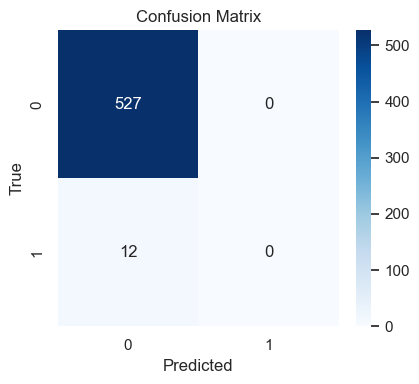

In [22]:
cm = confusion_matrix(y_val, y_pred)
print(cm)


plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


plt.tight_layout()
plt.show()

In [23]:
# Accessing elements at index 169 using .iloc
print(X_train.iloc[169])
print(y_train.iloc[169])


UTC            1.654716e+09
Temperature    2.610000e+01
Humidity       4.459000e+01
TVOC           0.000000e+00
eCO2           4.000000e+02
Ethanol        2.123500e+04
Pressure       9.374540e+02
PM1.0          1.920000e+00
PM2.5          1.990000e+00
NC0.5          1.318000e+01
NC1.0          2.056000e+00
NC2.5          4.600000e-02
CNT            3.683000e+03
Name: 476, dtype: float64
0


In [24]:
# Example: Load preprocessed new data (replace with your own data)
input_data=(1.654736e+09,1.996400e+01,4.978000e+01,2.800000e+01,4.000000e+02,2.014100e+04,9.396150e+02,1.260000e+00,1.310000e+00,8.700000e+00,1.357000e+00,3.100000e-02,2.274000e+03)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


[0]


# DecisionTree Model

In [25]:
from sklearn.tree import DecisionTreeClassifier
acc1=[]
acc2=[]
for i in range (2,16):
  dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dtc1.fit(X_train_split,y_train_split)
  dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dtc2.fit(X_train_split,y_train_split)
  acc1.append(dtc1.score(X_val, y_val))
  acc2.append(dtc2.score(X_val, y_val))

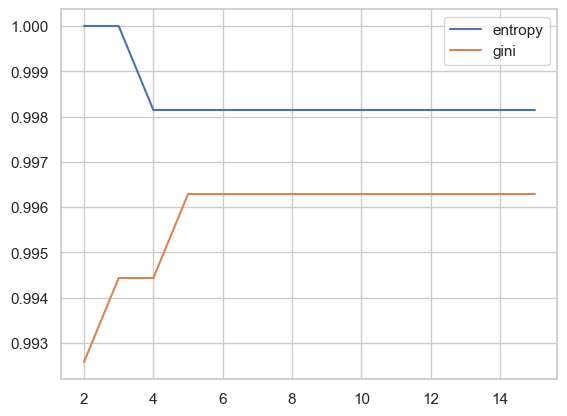

In [26]:
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()


In [27]:
clf = DecisionTreeClassifier(max_depth = 6 , criterion = 'entropy', random_state = 42)
clf = clf.fit(X_train_split, y_train_split)
print(clf.score(X_val, y_val) * 100)


99.81447124304268


# KNN Model

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

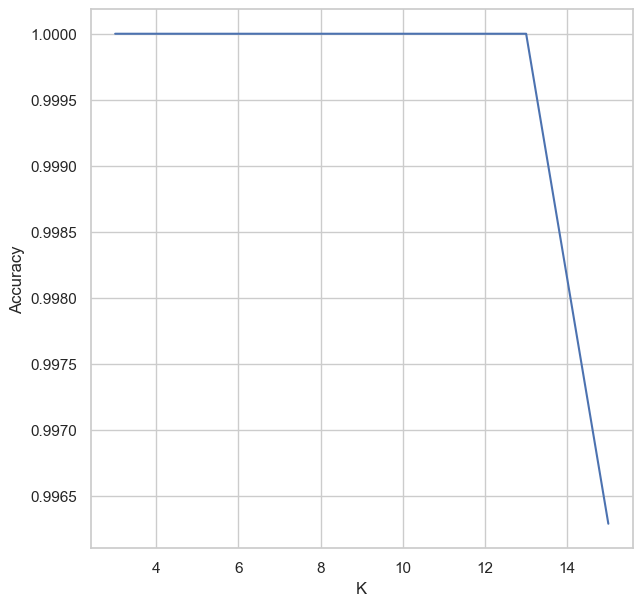

In [28]:
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (3,16,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train_split,y_train_split)
    s=knn.score(X_val, y_val)
    wss.append(s)
    plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),wss)

In [29]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=14)
scores_knn = cross_val_score(knn, X_val, y_val, cv=10,scoring="accuracy")
print(scores_knn.mean()*100)

99.07407407407408


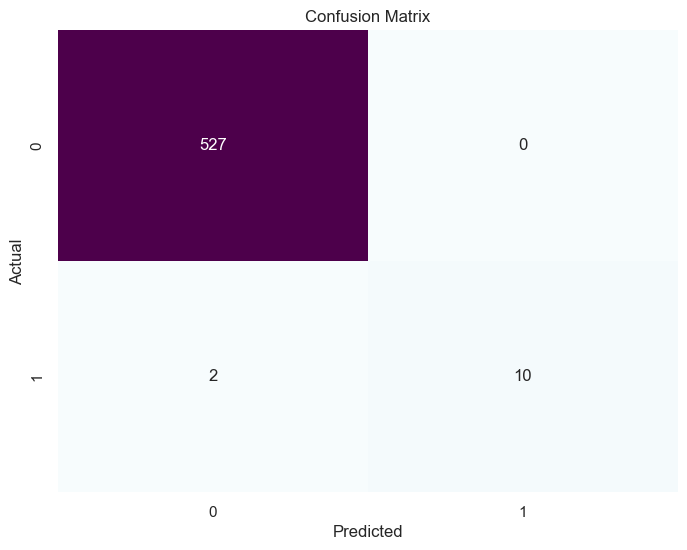

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
knn.fit(X_train_split,y_train_split)
Y_prd_knn=knn.predict(X_val)
y_pred_knn = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [31]:
# Save the Logistic Regression model logreg
joblib_logistic = "logistic_regression_file"
joblib.dump(model, joblib_logistic)

loaded_model = joblib.load(open(joblib_logistic, 'rb'))

pred_Y = loaded_model.predict(X_val)
result_logistic = np.round(accuracy_score(y_val, y_pred) ,2)
print(result_logistic)

0.98
